1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión lineal multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [69]:
# librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
%matplotlib inline

In [36]:
df = pd.read_csv('..\\..\\semana_20\\día_4\\usuarios_win_mac_lin.csv')
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [31]:
duration_max = df.iloc[:,0].unique().max()
duration_max 

898.0

In [33]:
duration_min = df.iloc[:,0].unique().min()
duration_min

1.0

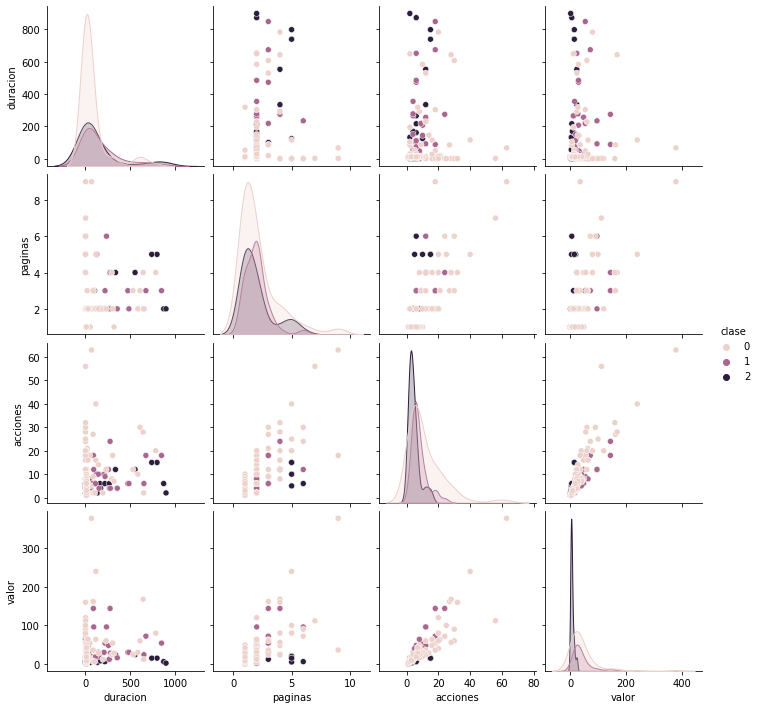

In [52]:
sns.color_palette("Paired")
sns.pairplot(df, hue="clase") #Scatterplot de 2 a 2 varaibles 

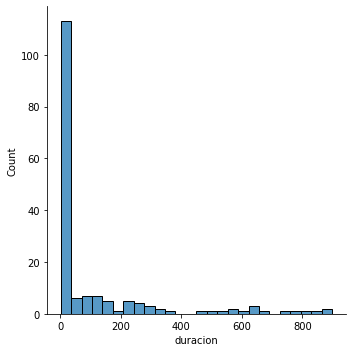

In [64]:
sns.displot(df['duracion']);

In [73]:
# features and target
X = df.drop("duracion", axis=1)
y = df["duracion"]

In [74]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [75]:
print(X.shape)
print(y.shape)

(170, 4)
(170,)


In [76]:
df.columns

Index(['duracion', 'paginas', 'acciones', 'valor', 'clase'], dtype='object')

In [77]:
#Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [78]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(136, 4)
(136,)
(34, 4)
(34,)


In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
print("Coeficientes: ", model.coef_)
print("Interceptor: ", model.intercept_)
print("R^2: ", model.score(X_train,y_train))

Coeficientes:  [21.13634697 12.87425465 -2.04495721 46.67111192]
Interceptor:  -16.37990315977322
R^2:  0.14813704890209367


In [83]:
model.predict(X_test)

array([ 37.61742438,  91.34160589, 130.58655995, 129.34486954,
        58.67150788,  23.30272389,  18.23520983,  37.61742438,
        53.24108984,  39.3715568 , 154.3723755 ,  58.67150788,
        92.59984602,  66.80211934,  57.68641378, 623.497578  ,
       139.95773278,  34.00054046,  85.0918031 ,  79.5941105 ,
       110.11930907, 236.79054271, 109.59706118,  77.39999367,
       266.91979121, 184.21079922, 152.94847939,  30.5151374 ,
        27.10181353, 188.55618093,  83.16177704,  54.05934556,
        18.8397212 , 130.58655995])

In [82]:
print("R^2: ", model.score(X_test,y_test))
#R^2 NEGATIVO ==> no puede ser negativo, se interpreta como '0'

R^2:  -0.3175945200865151


In [ ]:
# Y un 'R^2' quiere decir que los puntos no se ajustan NADA BIEN a una RECTA LINEAL

In [85]:
df['duracion'].describe()

count    170.000000
mean     111.075729
std      202.453200
min        1.000000
25%       11.000000
50%       13.000000
75%      108.000000
max      898.000000
Name: duracion, dtype: float64

In [87]:
np.sqrt(mean_squared_error(y_test,model.predict(X_test)))

220.6557323982307

In [88]:
corr_matrix = df.corr()
corr_matrix

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


<AxesSubplot:>

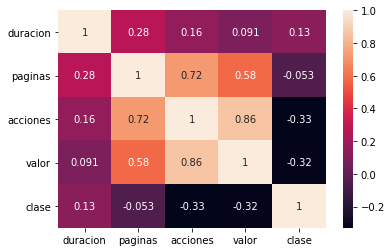

In [91]:
sns.heatmap(corr_matrix, annot= True)

In [92]:
#coeficiente de Pearson entre -1(correlacion lineal inversa/negativa) y 1 (relacion linear directa/positiva)

In [ ]:
#Obtener ahora la 'Regresión polinomial'